In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from plot_prop import *
from plot_projections import *
from plot_param import *
from prop_info import *
from get_segments import blade_alone, get_segments_points, get_planes
from new_projections import *
from parameters import *

%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
propeller = pd.read_csv('propeller_data.csv')

In [3]:
#####################################################################################################
##########################            PRE-PROCESSING            #####################################
#####################################################################################################
propeller_coords, vect_length, vect_out, vect_side = prepare_propeller(propeller)

dmiddle, dhighest, dlowest   = d_blade(vect_length, propeller_coords)                     #d of plan ax+by+cx+d = 0
upper_blade, lower_blade     = blade_alone(propeller_coords, vect_length, dmiddle)        #points of each blades

In [76]:
nb_seg = 10

In [77]:
planes = get_planes(upper_blade, dmiddle, dhighest, vect_length, nb_seg)   #get equations of planes for projection

In [78]:
all_plane_points = get_points(upper_blade, planes)                  #get points used for each projection

init
1
count
93
points_taken
30
Points of plane 1
init
1
count
101
points_taken
20
Points of plane 2
init
5
count
101
points_taken
23
Points of plane 3
init
4
count
101
points_taken
23
Points of plane 4
init
5
count
101
points_taken
19
Points of plane 5
init
26
count
101
points_taken
18
Points of plane 6
init
2
count
101
points_taken
17
Points of plane 7
init
8
count
100
points_taken
20
Points of plane 8
init
1
count
52
points_taken
20
Points of plane 9


In [82]:
#####################################################################################################
##########################              PROJECTION              #####################################
#####################################################################################################
right_param, left_param, right_pts, left_pts = get_all_projections(planes, all_plane_points)

In [89]:
x_list = []
y_right_list = []
y_left_list = []

for i in range(len(all_plane_points)):
    x, y_right, y_left = generate_points(right_param[i], right_pts[i], left_param[i], left_pts[i])
    x_list.append(x)
    y_right_list.append(y_right)
    y_left_list.append(y_left)

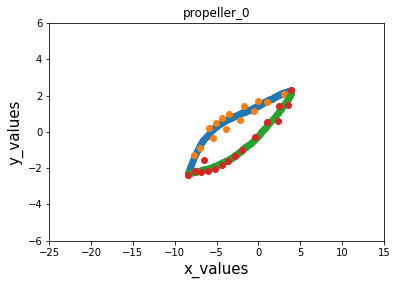

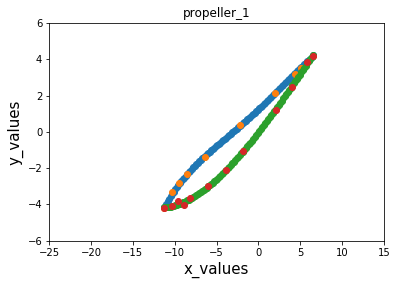

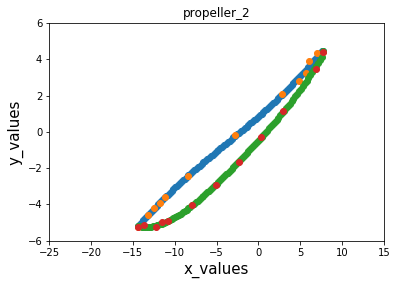

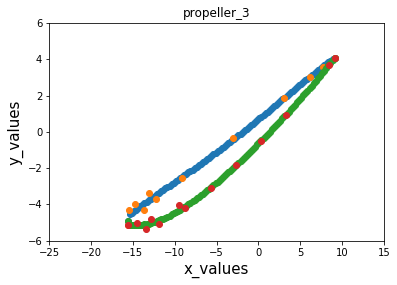

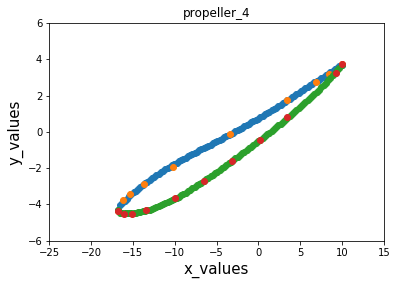

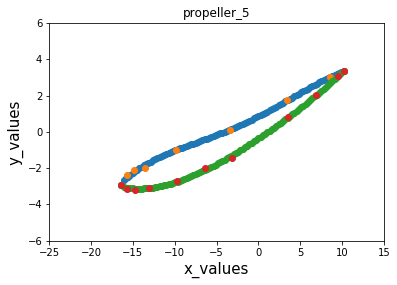

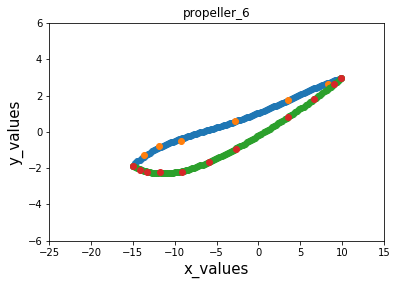

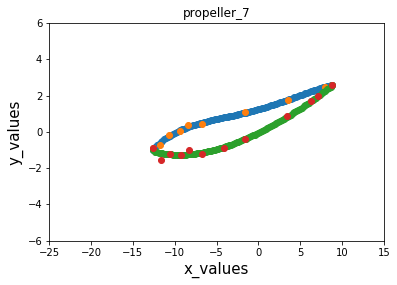

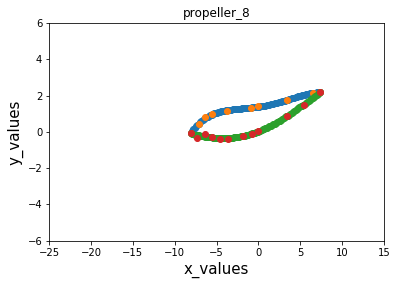

In [90]:
#for i in range(2, len(all_plane_points) -2):
for i in range(len(all_plane_points) ):
    plot_interpolation_both_sides( right_param[i], right_pts[i], left_param[i], left_pts[i], x_list[i], y_right_list[i], y_left_list[i], i, "propeller_" + str(i))

In [24]:
#####################################################################################################
##########################              PARAMETERS              #####################################
#####################################################################################################

### Hub

In [45]:
hub_inner_radius = get_hub_inner_radius(propeller_coords, vect_length)
hub_radius = param_hub_radius(propeller_coords, vect_length)
print(hub_radius)

8.099752279561


### Tip radius

In [92]:
tip_radius = get_tip_radius(propeller_coords)
print(tip_radius)

126.80676910381526


### Blade twist

In [47]:
blade_twist = get_blade_twist(right_param, left_param, right_pts, left_pts)

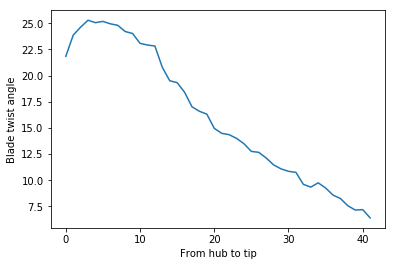

In [50]:
plt.plot(blade_twist[4:len(all_plane_points) -3])
plt.ylabel('Blade twist angle')
plt.xlabel('From hub to tip')
plt.show()

### Chord length

In [51]:
chord_length = get_chord_length(right_param, left_param, right_pts, left_pts)
print(chord_length)

[11.172685197675106, 12.306530414964357, 11.989576875980525, 13.134051225941965, 13.813919470575543, 15.288030866361593, 16.659896897644874, 17.867350990017382, 19.182123379914504, 20.59689910338392, 21.3689219187178, 21.990521471081145, 23.5422628181274, 23.763239861621408, 24.418863013060225, 24.658854722731096, 25.213979262743866, 26.257796750009135, 26.834813072250572, 27.332831952115185, 27.600599298495712, 27.797987896698853, 28.15894020907246, 28.12005106927131, 28.072233946668007, 27.990544877837976, 28.06362864486182, 27.597378250020622, 27.815620255011346, 23.830391600494934, 27.162758415014256, 26.731700040199314, 25.828138067273386, 25.367550533070652, 25.201798623918158, 24.283982982882105, 23.13337560719409, 22.310589339762927, 22.1397321826007, 20.615009466588788, 19.221631841710494, 18.11783074846222, 16.583695631507815, 15.291372064693864, 13.081193349666139, 11.40614672505413, 0.03421659968516728]


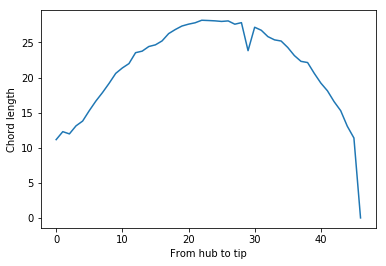

In [93]:
import matplotlib.pyplot as plt
plt.plot(chord_length)
plt.ylabel('Chord length')
plt.xlabel('From hub to tip')
plt.show()

In [58]:
lowest[0]

-7.125020329239145

In [59]:
x = np.linspace(lowest[0], highest[0], 100)

In [82]:
max(x)

6.6020617168198354

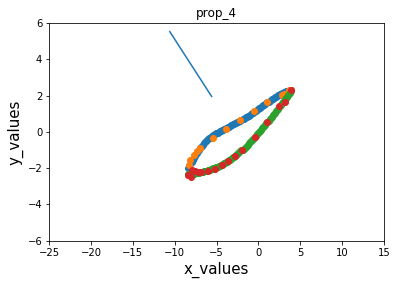

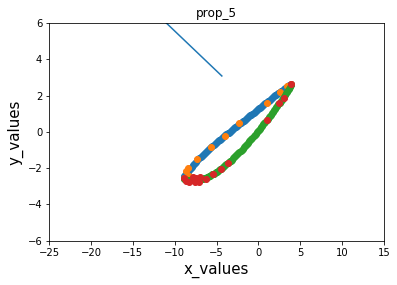

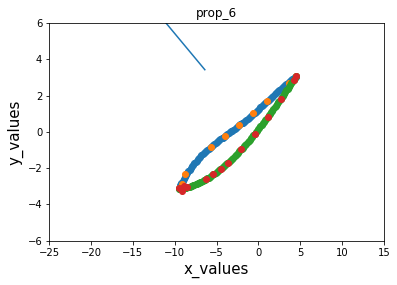

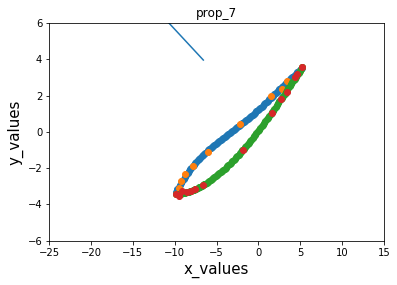

In [95]:
for i in range(4, 8):
#for i in range(len(all_plane_points) ):
    plot_interpolation_param(right_param[i], right_pts[i], left_param[i], left_pts[i], x_list[i], y_right[i], y_left[i], i, "prop_" + str(i))